In [1]:
import os, sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt
os.chdir('/Users/walu/mdwarfs/ae_classifier')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/ae_models')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/classifier_models')
#from save_recon_plots import save_recon_plots
import data_processor as dp
from dwarf_trainer import DwarfTrainer


In [2]:
dpc = dp.DataProcessing('../training_data/test_data.csv', metadata_file= '../fake_metadata.csv',input_dataset_shape=1024)



/Users/walu/mdwarfs/ae_classifier/data_processor.py:23: UserWarning: Dataset has unwanted extra columns. Please remove them before pre-processing
  warnings.warn('Dataset has unwanted extra columns. Please remove them before pre-processing', UserWarning)


Shape of loaded data: (11592, 1026)
Label Mapping:
'EB' -> 0
'ROT' -> 1
Input shape: 1024
Train set size: 8114
Validation set size: 3478
Number of classes: 2
Data processing completed.


In [3]:
"""
'lr' sets the learning rate for autoencoder and classifier
if separate learning rate for AE and classifier is needed, 
set lr for AE learning rate, and classifier_lr 
for classifier learning rate
"""

trainer = DwarfTrainer(
    data_processor= dpc,
    ae_model = 'nets_1024',
    classifier_model = 'binary_classifier',
    model_id = 'binary_balanced_bens_cubic',
    batch_size = 256,
    num_epochs = 2000,
    lr = 1e-4,
    classifier_lr = 1e-4,
    scheduler_type = None,
    leaky_relu_a= 0.1,
    min_delta = 1e-6,
    patience = 100,
    training_mode = 'joint',
    ae_epochs = 500,
    class_weighted_loss= True,
    save_val_recons= True
)

selected encoder: encode(
  (unflatten): Unflatten(dim=1, unflattened_size=(1, 32))
  (en_layer1): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer2): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer3): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer4): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer5): S

In [4]:
#trainer.set_lr(1e-3)
trainer.set_lr(1e-3)
trainer.train_and_validate()

Joint training mode: training autoencoder and classifier together.
Epoch [1/2000], Train Recon: 49.6475, Train Class: 0.7464, Val Recon: 13.3601, Val Class: 0.7925, Val Recall: 1.0000, Val accuracy: 0.5000, 


KeyboardInterrupt: 

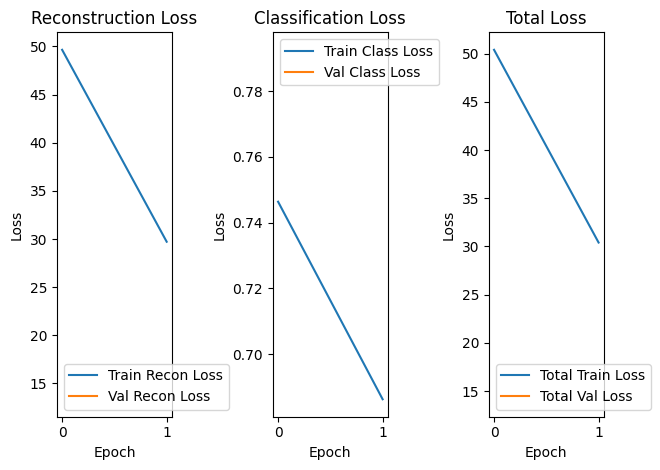

In [5]:
trainer.plot_losses()

Plotting accuracies for 1 epochs.


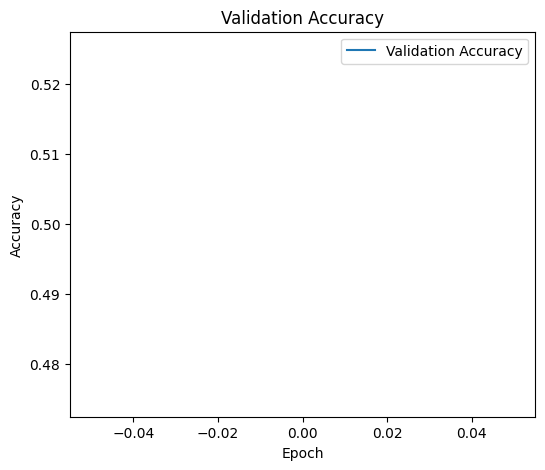

In [6]:
trainer.plot_accuracy()

<Figure size 800x600 with 0 Axes>

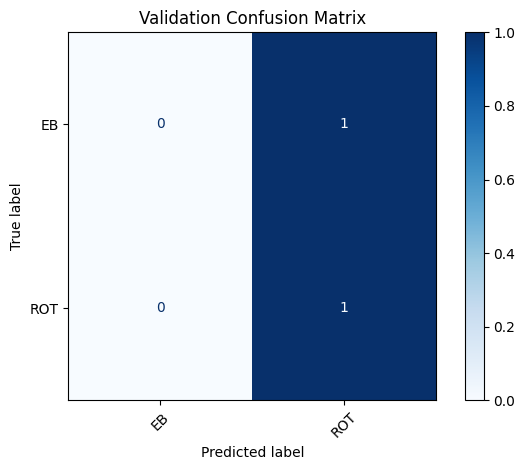

In [7]:
trainer.plot_confusion_matrix()

In [9]:
trainer.load_best_model('model_beta_testing_binary_unbalanced_bcelogits/best_model.pth')
#trainer.utils._validate()


: 

In [10]:
trainer.utils._validate()

{'val_recon_loss': 3.59971868375252,
 'val_class_loss': tensor(0.4641),
 'val_accuracy': 0.8523434827232296}

In [7]:
from save_recon_plots import save_recon_plots

In [8]:
df = pd.read_csv('../val_recon_plots/val_originals_and_reconstructions.csv')
originals = df[df['type'] == 'original'].drop(columns='type').reset_index(drop=True)
recons = df[df['type'] == 'reconstruction'].drop(columns='type').reset_index(drop=True)
save_recon_plots(originals, recons, 'recons')

AssertionError: Original and reconstruction must have the same shape